In [1]:
import torch
from torch.autograd import grad
import matplotlib.pyplot as plt

In [13]:
x = torch.arange(-10., 10., step=.1, requires_grad=True)
x_det = x.detach().numpy()

In [18]:
f = x ** 2
g = 1/3 * x ** 2 - 2 * x + 6

In [19]:
fp = grad(outputs=f, inputs=x, grad_outputs=torch.ones_like(f))[0]
gp = grad(outputs=g, inputs=x, grad_outputs=torch.ones_like(g))[0]

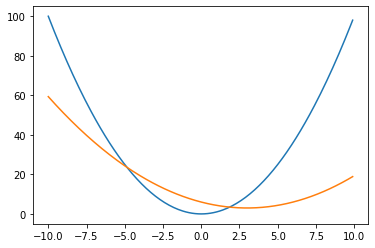

In [16]:
plt.plot(x_det, f.detach().numpy())
plt.plot(x_det, g.detach().numpy())

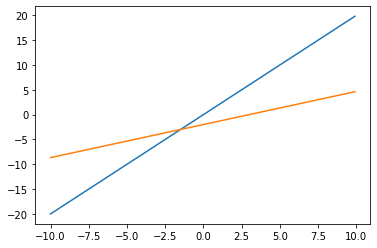

In [20]:
plt.plot(x_det, fp.detach().numpy())
plt.plot(x_det, gp.detach().numpy())

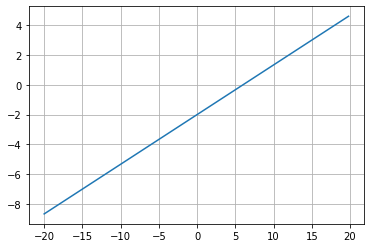

In [22]:
plt.plot(fp.detach().numpy(), gp.detach().numpy())
plt.grid()

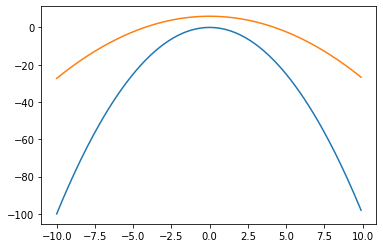

In [24]:
plt.plot(x_det, (f - x * fp).detach().numpy())
plt.plot(x_det, (g - x * gp).detach().numpy())

In [38]:
xn = torch.arange(1e-6, 100, step=100/10000, requires_grad=True)/100
print(xn)

tensor([1.0000e-08, 1.0001e-04, 2.0001e-04,  ..., 9.9970e-01, 9.9980e-01,
        9.9990e-01], grad_fn=<DivBackward0>)


In [33]:
len(xn) ** 2

100000000